# Градиентный спуск.

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.sum((X.dot(w) - y) ** 2) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2 * X.T.dot((X.dot(w) - y)) / y.shape[0]

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_new =w_init
    w_des = [w_init]
    for i in range(n_iterations):
      w_new = w_init - lr* loss.calc_grad(X,y,w_init)
      w_init=w_new
      w_des.append(w_init)
    return np.array(w_des)
      

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

Descend with learning rate: 0.0001
(101, 2)
(300, 2)
(300,)


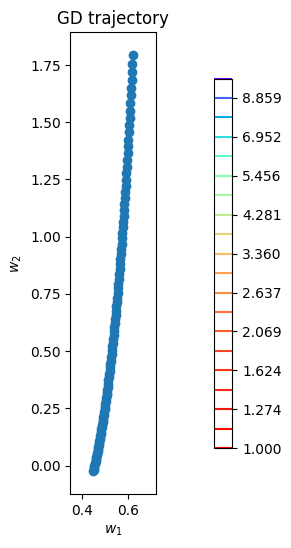

Descend with learning rate: 0.0012000000000000001
(101, 2)
(300, 2)
(300,)


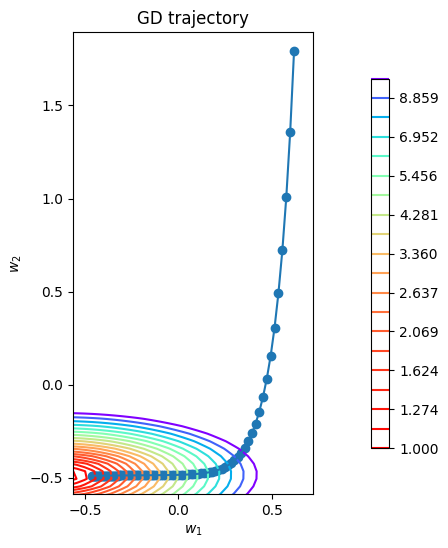

Descend with learning rate: 0.0023
(101, 2)
(300, 2)
(300,)


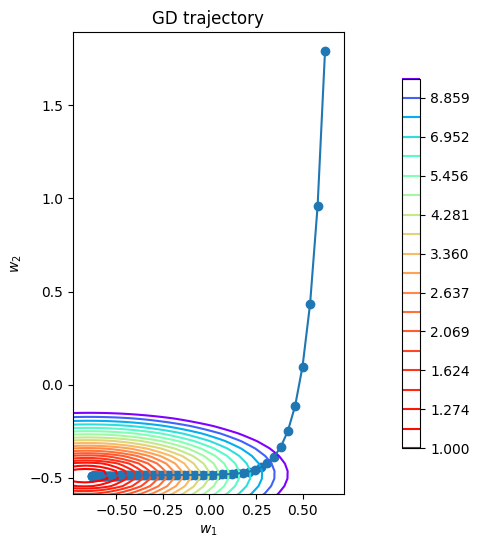

Descend with learning rate: 0.0034
(101, 2)
(300, 2)
(300,)


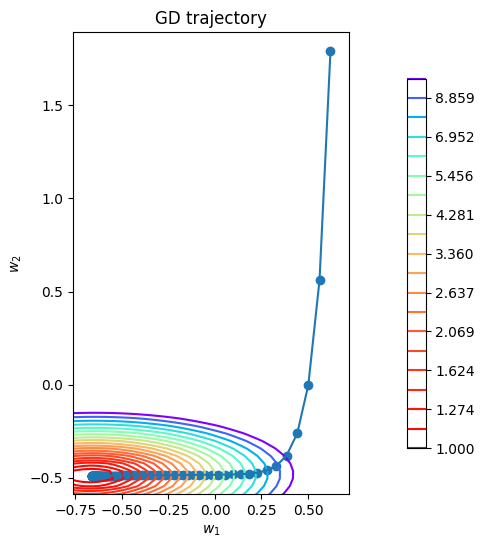

Descend with learning rate: 0.0045000000000000005
(101, 2)
(300, 2)
(300,)


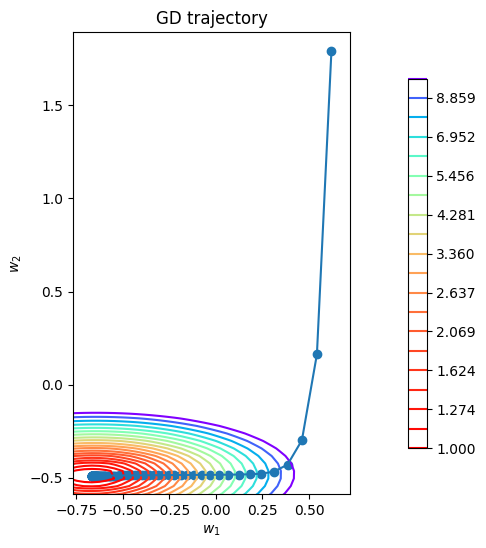

Descend with learning rate: 0.005600000000000001
(101, 2)
(300, 2)
(300,)


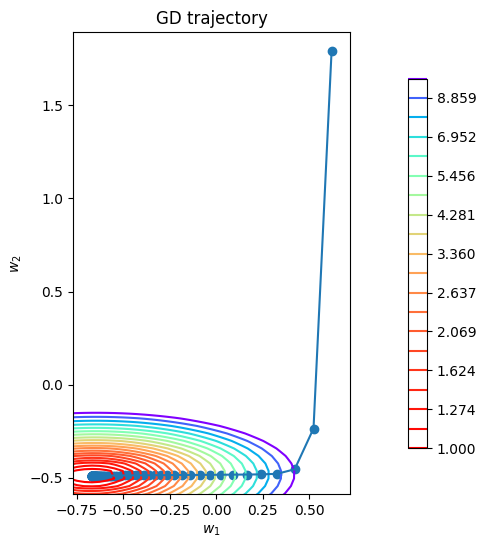

Descend with learning rate: 0.0067
(101, 2)
(300, 2)
(300,)


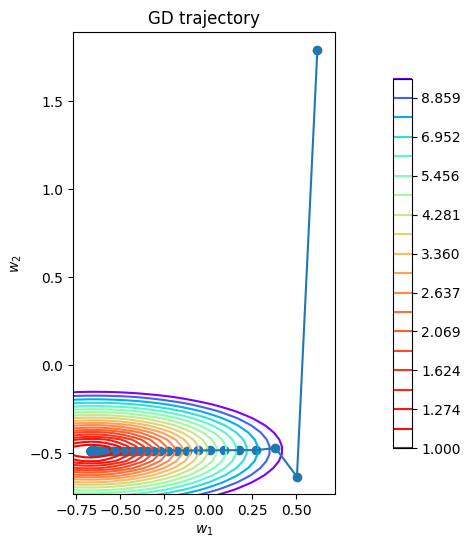

Descend with learning rate: 0.0078000000000000005
(101, 2)
(300, 2)
(300,)


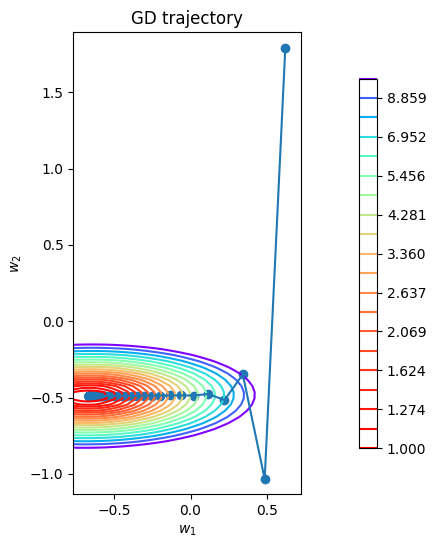

Descend with learning rate: 0.0089
(101, 2)
(300, 2)
(300,)


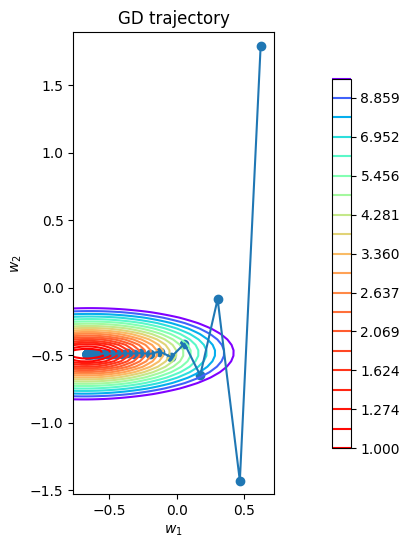

Descend with learning rate: 0.01
(101, 2)
(300, 2)
(300,)


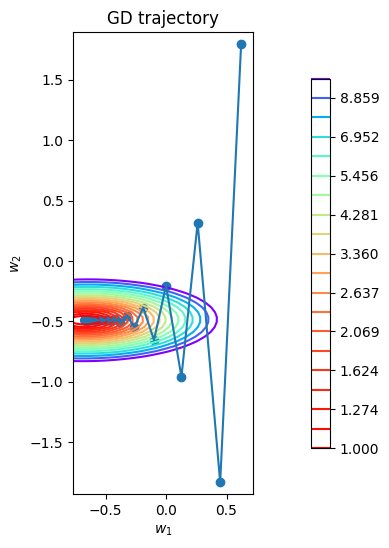

In [ ]:
for lr in np.linspace(0.0001, 0.01, 10):
    print(f'Descend with learning rate: {lr}')
    plot_gd(gradient_descent(w_init, X, y, loss, lr, n_iterations=100), X, y, loss)


### Вывод
Выбор гиперпараметра learning rate сильно сказывается на поведение  градиентного спуска:

При очень маленьком значении (0.0001) мы рискуем не дойти до минимума за данное количество итераций,

и наоборот большой learning rate (близкий к 0.01+) начинает "скакать", что затрудняет нахождение минимума функции

Теперь реализуем стохастический градиентный спуск

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_new =w_init
    w_des = [w_init]
    for i in range(n_iterations):
      ind = np.random.choice(X.shape[0], size=batch_size, replace=False)
      X_batch = X[ind]
      y_batch = y[ind]
      w_new = w_init - lr* loss.calc_grad(X_batch,y_batch,w_init)
      w_init=w_new
      w_des.append(w_init)
    return np.array(w_des)

Gradient descend with learning rate: 0.0001 and batch_size: 5


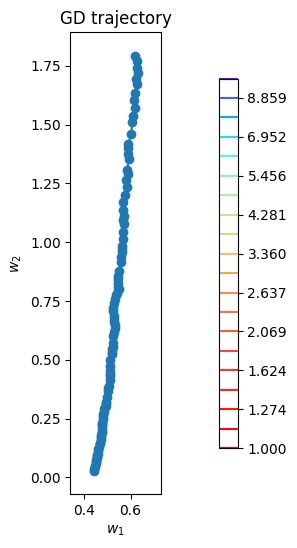

Gradient descend with learning rate: 0.002575 and batch_size: 5


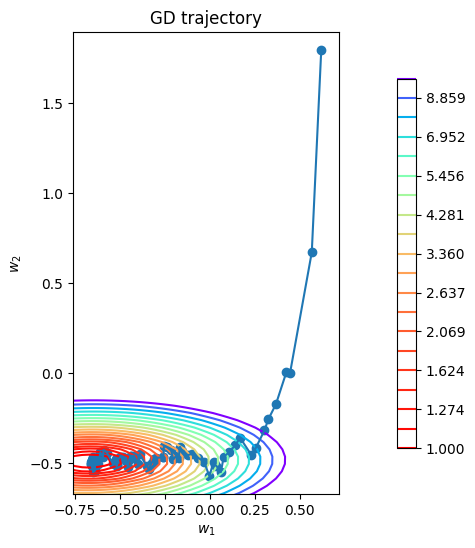

Gradient descend with learning rate: 0.005050000000000001 and batch_size: 5


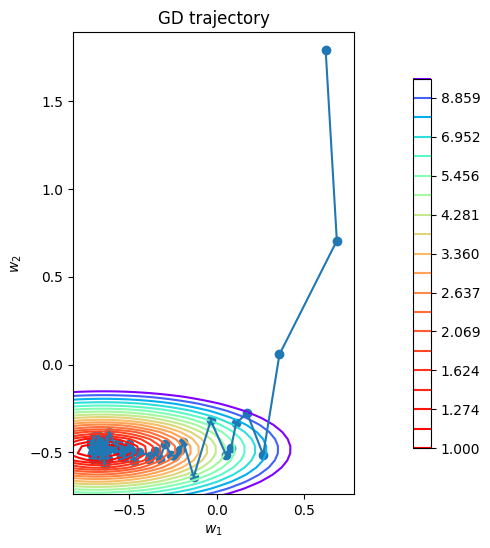

Gradient descend with learning rate: 0.007525000000000001 and batch_size: 5


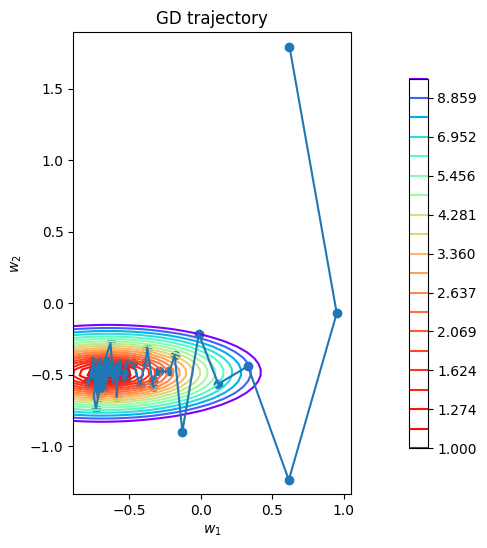

Gradient descend with learning rate: 0.01 and batch_size: 5


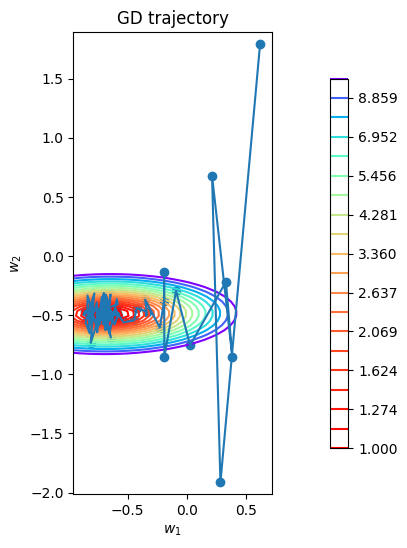

Gradient descend with learning rate: 0.0001 and batch_size: 13


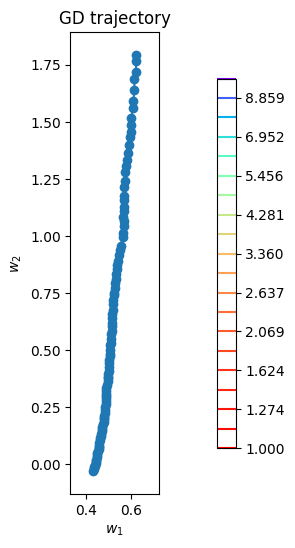

Gradient descend with learning rate: 0.002575 and batch_size: 13


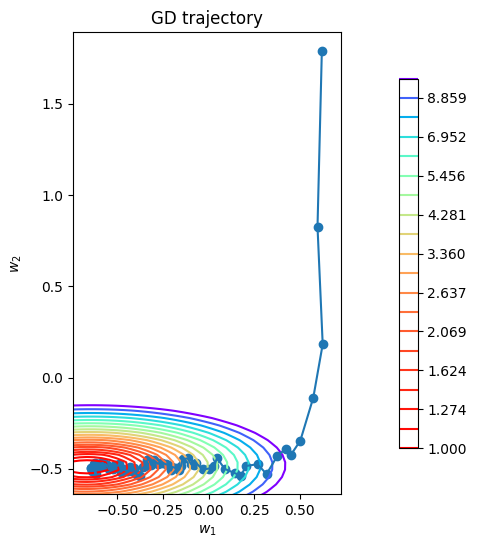

Gradient descend with learning rate: 0.005050000000000001 and batch_size: 13


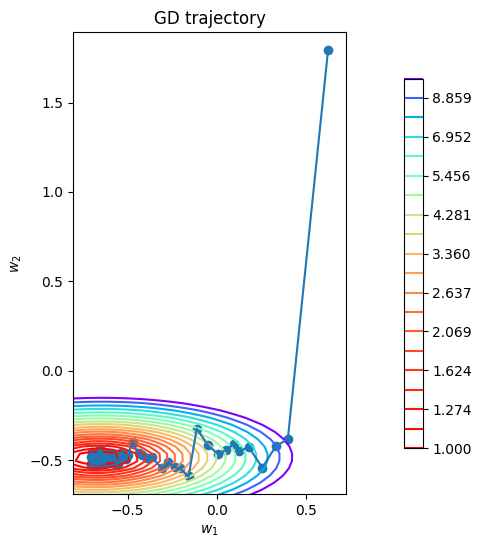

Gradient descend with learning rate: 0.007525000000000001 and batch_size: 13


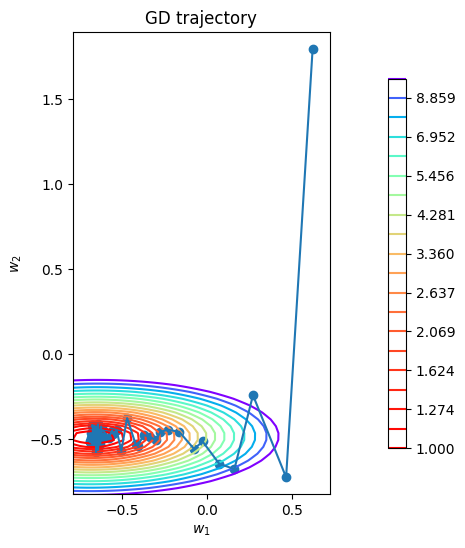

Gradient descend with learning rate: 0.01 and batch_size: 13


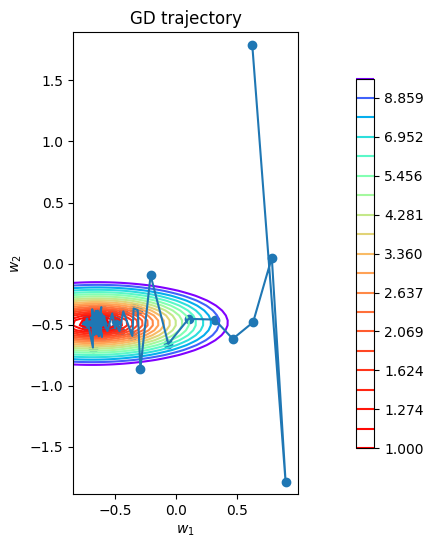

Gradient descend with learning rate: 0.0001 and batch_size: 21


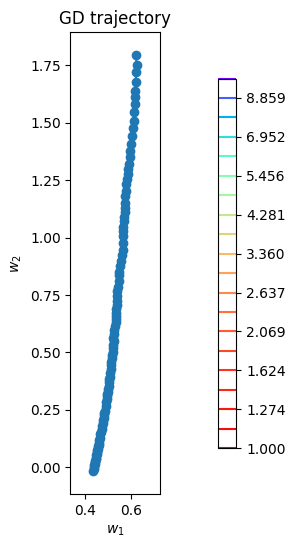

Gradient descend with learning rate: 0.002575 and batch_size: 21


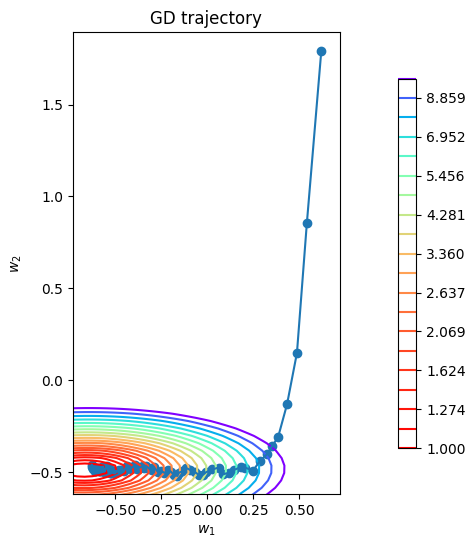

Gradient descend with learning rate: 0.005050000000000001 and batch_size: 21


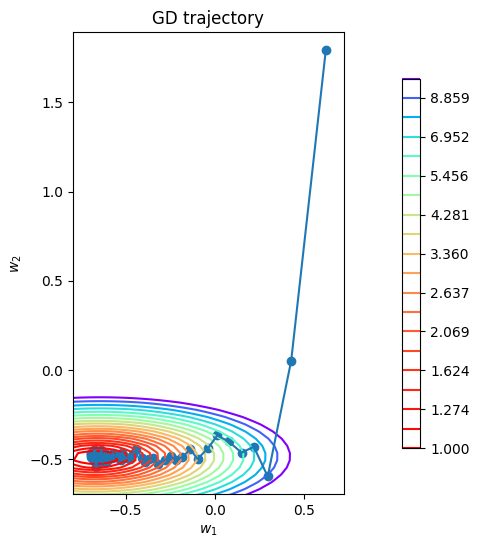

Gradient descend with learning rate: 0.007525000000000001 and batch_size: 21


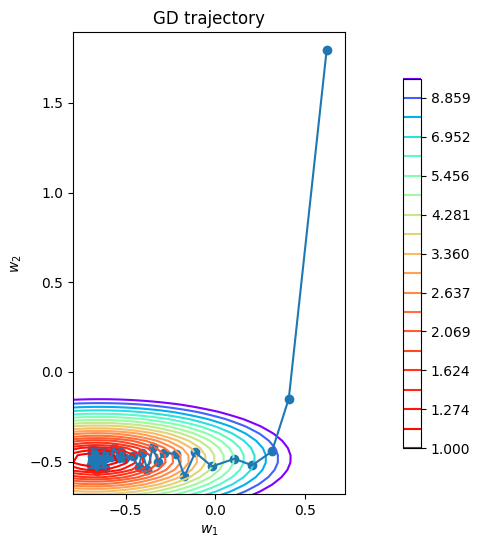

Gradient descend with learning rate: 0.01 and batch_size: 21


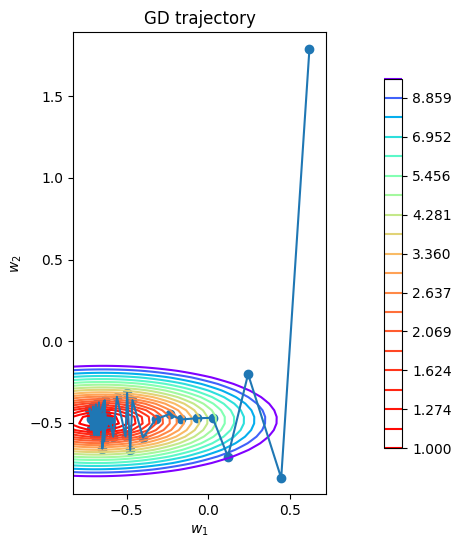

Gradient descend with learning rate: 0.0001 and batch_size: 29


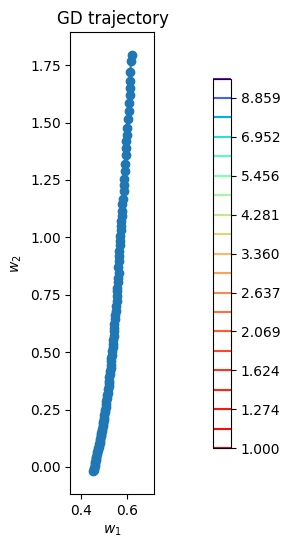

Gradient descend with learning rate: 0.002575 and batch_size: 29


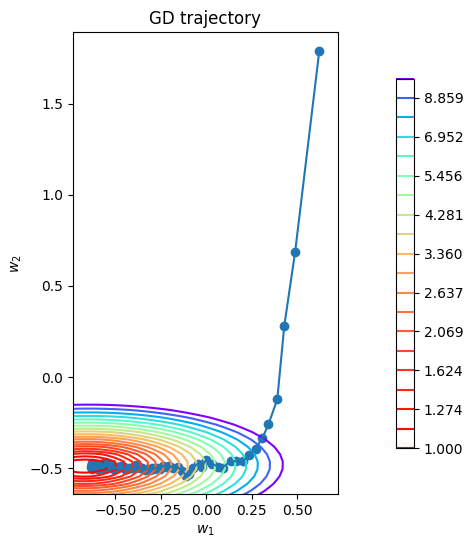

Gradient descend with learning rate: 0.005050000000000001 and batch_size: 29


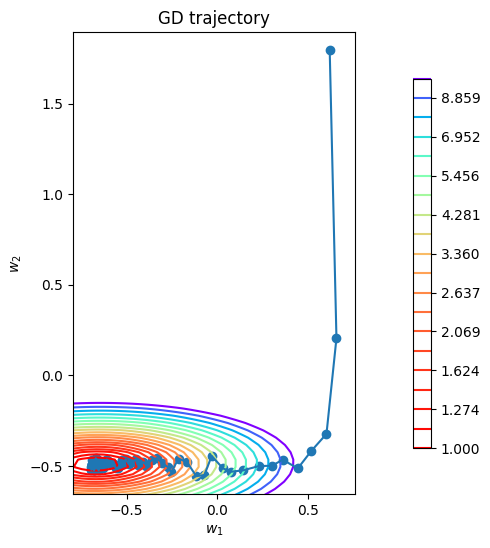

Gradient descend with learning rate: 0.007525000000000001 and batch_size: 29


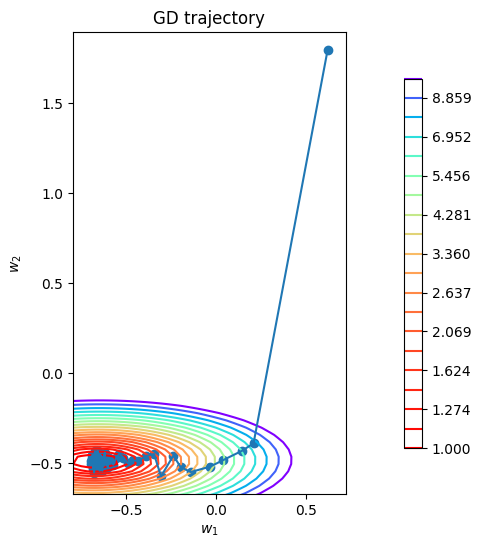

Gradient descend with learning rate: 0.01 and batch_size: 29


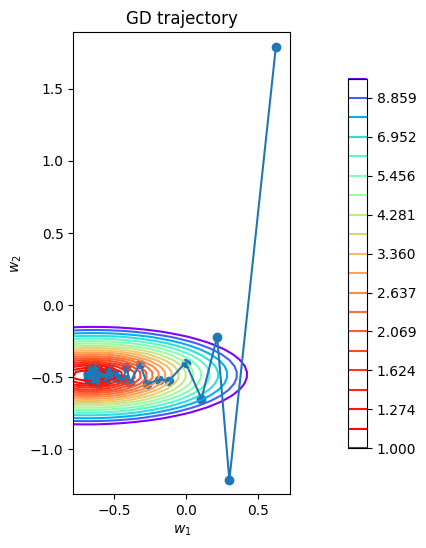

Gradient descend with learning rate: 0.0001 and batch_size: 37


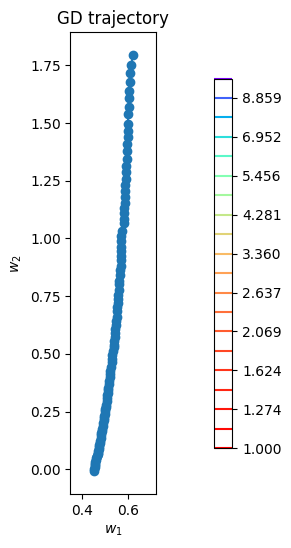

Gradient descend with learning rate: 0.002575 and batch_size: 37


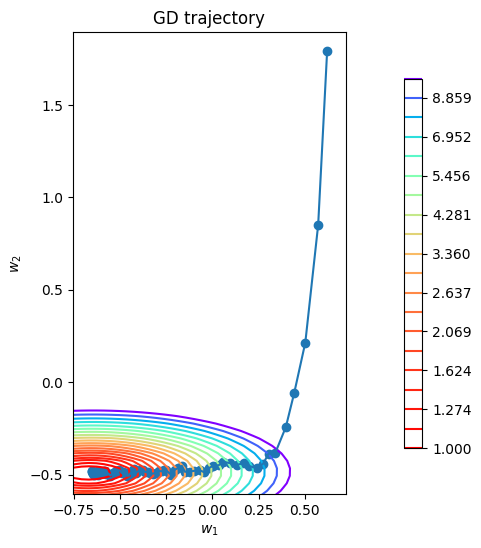

Gradient descend with learning rate: 0.005050000000000001 and batch_size: 37


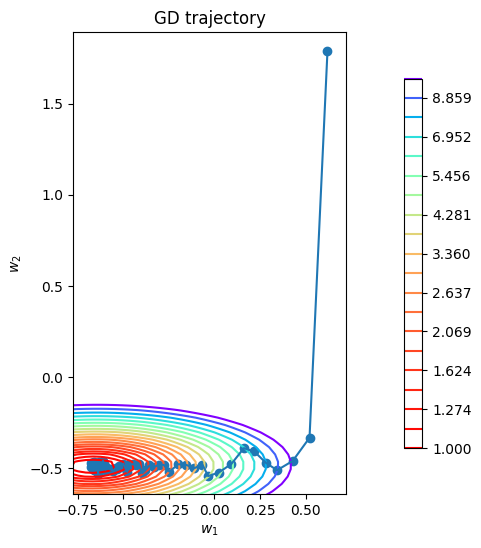

Gradient descend with learning rate: 0.007525000000000001 and batch_size: 37


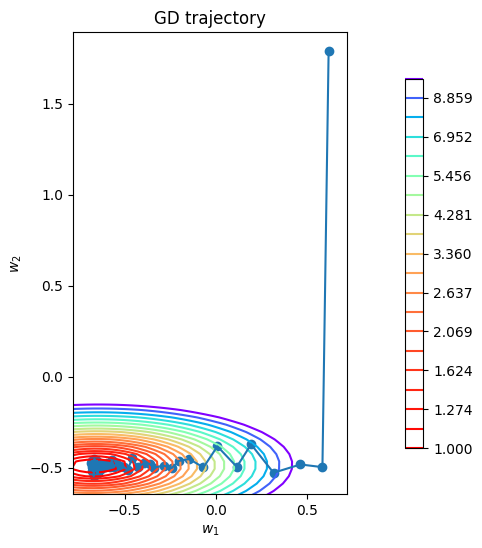

Gradient descend with learning rate: 0.01 and batch_size: 37


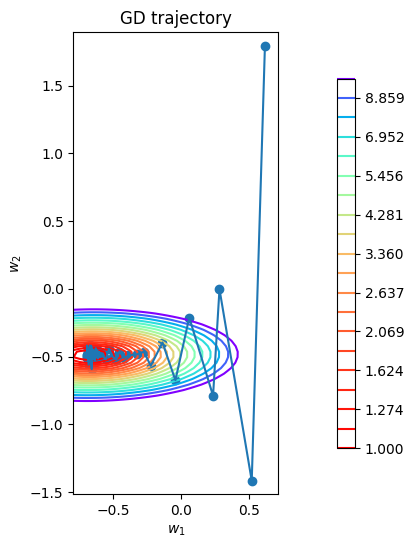

In [ ]:
lrs = np.linspace(0.0001, 0.01, 5)
batches = np.arange(5, 40, 8)
for batch in batches:
    for lr in lrs:
        print(f'Gradient descend with learning rate: {lr} and batch_size: {batch}')
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch, n_iterations=100), X, y, loss)

###Вывод
Зависимость от learning rate обсуждалась в прошлом выводе 

В этом прогоне стоит заметить, что размер бача сильно влияет на "плавность" спуска 

Чем больше батч, тем плавнее будет спуск

При этом,  маленький learning rate сглаживает хаотичные шаги стахостического градиентного спуска

Высокий learning rate и маленький батч дают высокие скачки/ колебания ( затрудняет попадение в  минимум)

Лучше использовать адаптивный шаг, внедрить инерцию, Adagrad, Adam или другие варианты оптимизаций градиентного спуска

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_new =w_init
    w_des = [w_init]
    for i in range(n_iterations):
      ind = np.random.choice(X.shape[0], size=batch_size, replace=False)
      X_batch = X[ind]
      y_batch = y[ind]
      lr_adapt = lr * ((1 / (1 + i)) ** p)
      w_new = w_init - lr_adapt* loss.calc_grad(X_batch,y_batch,w_init)
      w_init=w_new
      w_des.append(w_init)
    return np.array(w_des)

P: 0.01


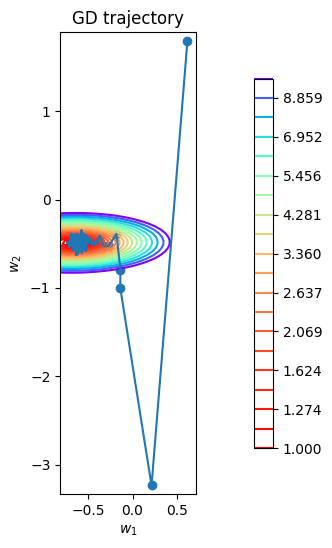

P: 0.12


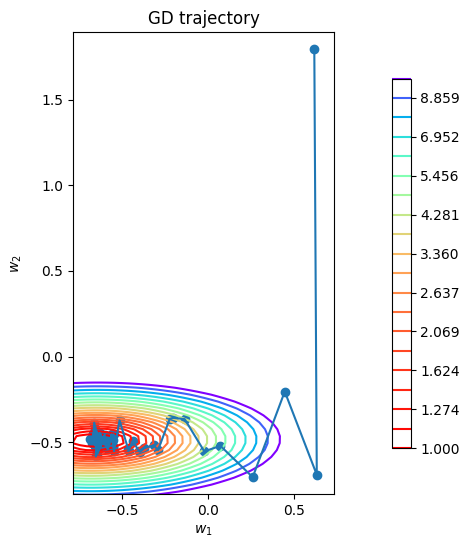

P: 0.23


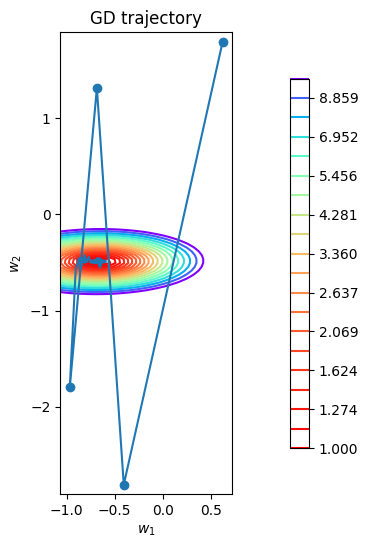

P: 0.34


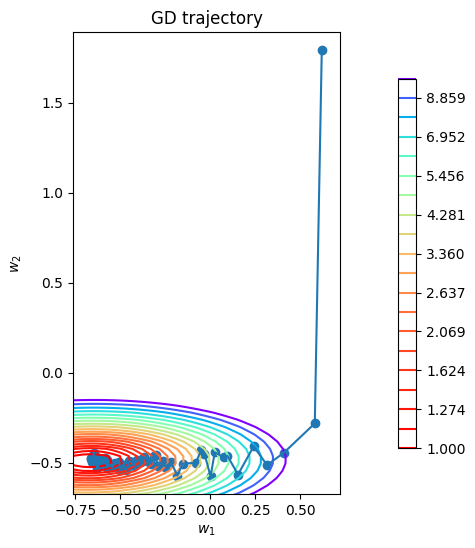

P: 0.45


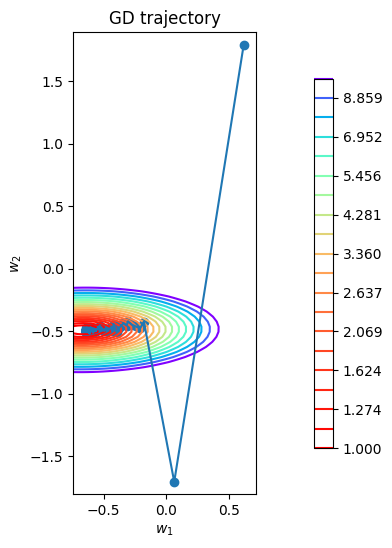

P: 0.56


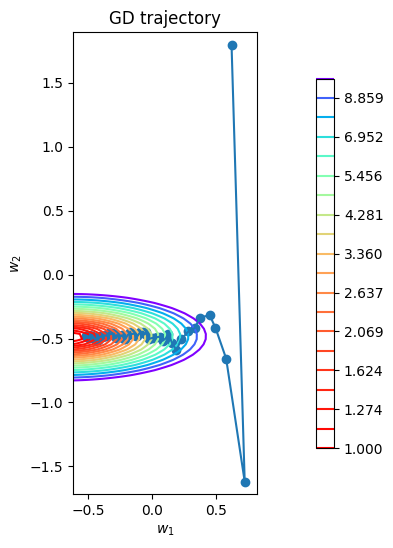

P: 0.67


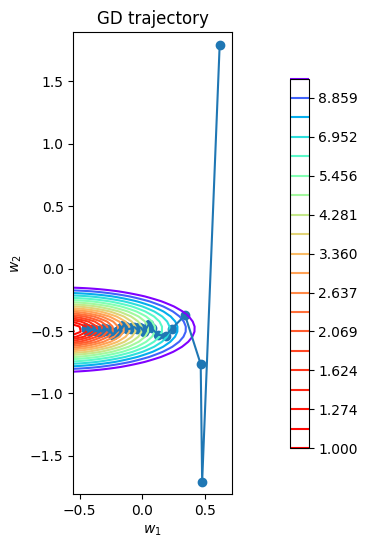

P: 0.78


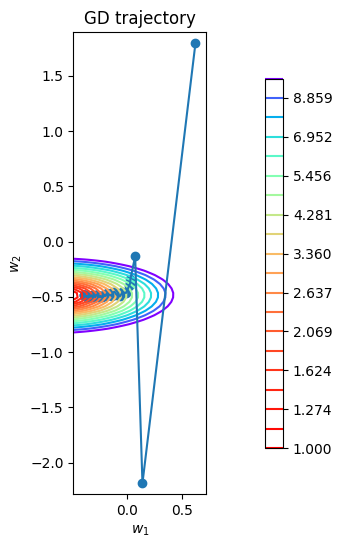

P: 0.89


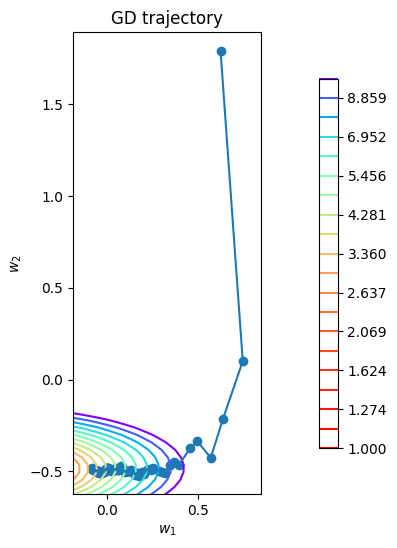

P: 1.0


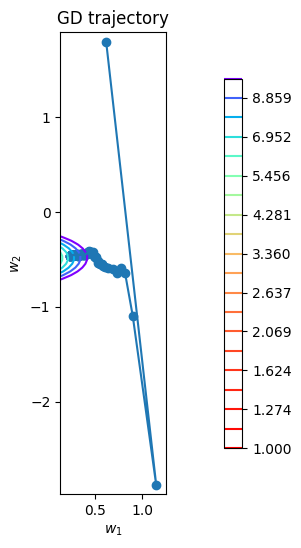

In [ ]:
ps = np.linspace(0.01, 1, 10)
for p in ps:
    print(f'P: {p}')
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=p, n_iterations=100), X, y, loss)

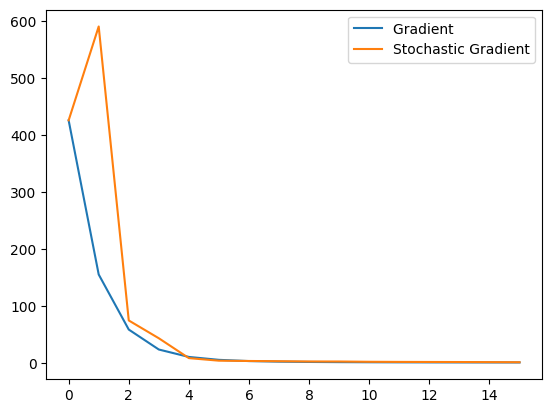

In [ ]:
np.random.seed(5)
w_gd = gradient_descent(w_init, X, y, loss, lr=0.01, n_iterations=15)
w_gd_losses = np.array([loss.calc_loss(X, y, w) for w in w_gd])
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=0.4, n_iterations=15)
w_sgd_losses = np.array([loss.calc_loss(X, y, w) for w in w_sgd])

plt.plot(w_gd_losses, label='Gradient ')
plt.plot(w_sgd_losses, label='Stochastic Gradient')
plt.legend()

Идейно стахостический градиентный спуск уменьшает затраты по времени, но при этом становится менее стабильным ( мы можем видеть это вначале, потом он сглаживается из-за адаптивного шага (затухающий градиент))

Однако, на небольшой выборке, как наша любой вариант спуска будет работать очень быстро, поэтому на маленьких данных трудно оценивать преимущества sgd на скорости сходимости

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # из нормального распределения
        w_init = np.random.randn(X.shape[1])
        w_path = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_path[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

In [ ]:
linear_regression = LinearRegression(MSELoss())

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
X_raw.columns = X_raw.columns.astype(str)


In [ ]:
cat_col = X_raw.dtypes[X_raw.dtypes == 'object'].index
num_col = X_raw.dtypes[X_raw.dtypes != 'object'].index

In [ ]:
X_raw[cat_col].isna().any()

2     False
3     False
4     False
5      True
6     False
7     False
8     False
14    False
15    False
17    False
dtype: bool

In [ ]:
X_raw[cat_col] = X_raw[cat_col].fillna(X_raw[cat_col].mode().iloc[0])
X_raw = pd.get_dummies(X_raw, columns=cat_col)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

In [ ]:
X_train.loc[:, num_col] = X_train[num_col].fillna(X_train[num_col].median())
X_test.loc[:, num_col] = X_test[num_col].fillna(X_train[num_col].median())

In [ ]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [ ]:
np.random.seed(42)
lin_reg = LinearRegression(MSELoss())
lin_reg = lin_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, lin_reg.predict(X_train), squared=False))
print(mean_squared_error(y_test, lin_reg.predict(X_test), squared=False))

1108.6302091854573
3379.6023641421857


In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.sum((X.dot(w) - y) ** 2) / y.shape[0] + self.coef * np.sum((w[:-1] ** 2))
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 * X.T.dot((X.dot(w) - y))) / y.shape[0]+ 2 * self.coef * np.append(w[:-1], 0)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

In [ ]:
np.random.seed(42)
l2_reg = LinearRegression(loss=MSEL2Loss(0.002))
l2_reg = l2_reg.fit(X_train, y_train)

print(mean_squared_error(y_train, l2_reg.predict(X_train), squared=False))
print(mean_squared_error(y_test, l2_reg.predict(X_test), squared=False))
# Подбором был получен коэффициент регуляризации 0.002
# на обычной регрессии train/test - 1108/3379

1251.7108512657537
2874.4632113881216


In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        err = X.dot(w) - y
        mask = np.abs(err) < self.eps
        return (np.sum((err[mask] ** 2)/2) + np.sum(self.eps * (np.abs(err[~mask]) - self.eps/2))) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        err = X.dot(w) - y
        mask = np.abs(err) < self.eps
        err[~mask] = self.eps * np.sign(err[~mask])
        
        return np.sum(X * err.reshape(-1, 1), axis=0) / len(y)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

In [ ]:
hubed_reg = LinearRegression(loss=HuberLoss(79))
hubed_reg.fit(X_train, y_train)
print(mean_squared_error(y_train, hubed_reg.predict(X_train), squared=False))
print(mean_squared_error(y_test, hubed_reg.predict(X_test), squared=False))
# На тестовой выборке huber чуть лучше чем mse с l2 регуляризацией( скорее одинаково, чем лучше) ( и лучше чем стандартный mse без регуляризации)
# Однако на тренировочной выборке ошибка больше

1430.7015673871222
2852.8506225841857


In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        return np.sum((X.dot(w) - y) ** 2) / y.shape[0]
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        return 2 * X.T.dot((X.dot(w) - y)) / y.shape[0]

loss = MSELoss()

np.random.seed(1337)

n_features = 2
n_objects = 300
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w = np.random.uniform(-2, 2, (n_features))


T0 = 50.0
T_min = 1e-6
alpha = 0.4
n_iter = 100


def get_next(x):
    x_new = x.copy()
    x_new += np.random.standard_t(10, size=x.shape)
    return x_new

w_losess=list()
w_path=list()
w_path.append(w)
w_losess.append(loss.calc_loss(X,y,w))
T = T0
for i in range(n_iter):
    w_new = get_next(w)
    delta = loss.calc_loss(X,y,w_new) - loss.calc_loss(X,y,w)
    if delta < 0 or np.random.uniform(0, 1) < np.exp(-delta / T):
        w_losess.append(loss.calc_loss(X,y,w_new))
        w_path.append(w_new)
        w = w_new
    T *= alpha
    T = max(T, T_min)


In [ ]:
print(np.array(w_path).shape)
print(X.shape)
print(y.shape)

(17, 2)
(300, 2)
(300,)


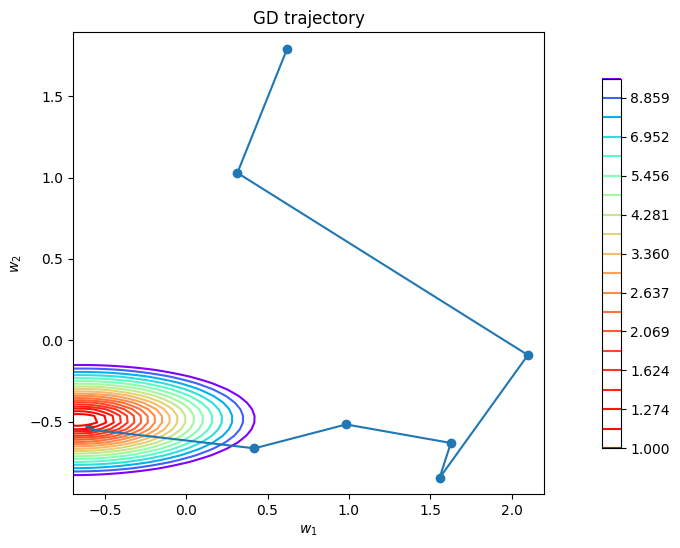

In [ ]:
plot_gd(np.array(w_path), X, y, loss)

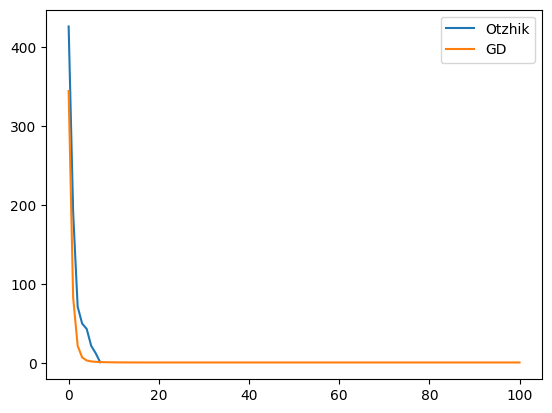

In [ ]:
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w = np.random.uniform(-2, 2, (n_features))

w_path = gradient_descent(w, X, y, loss, lr=0.01, n_iterations=100)
w_losses2 = np.array([loss.calc_loss(X, y, v) for v in w_path])

plt.plot(w_losess, label='Otzhik')
plt.plot(w_losses2, label='GD')
plt.legend()